In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from utils import percentile

import warnings
warnings.filterwarnings("ignore")

In [2]:
sample_data_day = pd.read_csv('models_sku/sample_data_day.csv')
sample_data_day

,SKU,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset
0,562,0.452608,0.015261,0.515447,log-log,0.452608,1.0,22,30,SKU,SKU|Day
1,562,0.179902,0.004667,0.675319,log-log,0.179902,1.0,28,40,SKU,SKU|Day
2,562,-1.765607,0.106413,0.020780,log-log,-1.765607,5.0,37,50,SKU,SKU|Day
3,562,-1.099432,0.069014,0.042574,log-log,-1.099432,5.0,41,60,SKU,SKU|Day
4,562,-1.241509,0.085799,0.013863,log-log,-1.241509,6.0,46,70,SKU,SKU|Day
...,...,...,...,...,...,...,...,...,...,...,...
113029,319939,-0.003417,0.000045,0.881676,log-log,-0.003417,1.0,25,500,SKU,SKU|Day
113030,319939,-0.002888,0.000040,0.877690,log-log,-0.002888,1.0,25,600,SKU,SKU|Day
113031,319939,-0.010972,0.000353,0.619958,log-log,-0.010972,2.0,25,700,SKU,SKU|Day
113032,319939,-0.009308,0.000311,0.618210,log-log,-0.009308,2.0,25,800,SKU,SKU|Day


In [3]:
sample_data_week = pd.read_csv('models_sku/sample_data_week.csv')
sample_data_week

,SKU,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset
0,1358,-0.403381,0.067880,0.467210,log-log,-0.403381,0.857143,10,10,SKU,SKU|Week
1,1358,-0.262149,0.030686,0.460092,log-log,-0.262149,1.714286,17,20,SKU,SKU|Week
2,1358,-0.324295,0.031162,0.350741,log-log,-0.324295,4.142857,26,30,SKU,SKU|Week
3,1358,-0.318219,0.031545,0.272894,log-log,-0.318219,4.738095,31,40,SKU,SKU|Week
4,1358,-0.248400,0.022103,0.302821,log-log,-0.248400,5.595238,37,50,SKU,SKU|Week
...,...,...,...,...,...,...,...,...,...,...,...
69649,151090,-0.185130,0.004100,0.626952,log-log,-0.185130,1.142857,37,60,SKU,SKU|Week
69650,151090,-0.155117,0.004099,0.598495,log-log,-0.155117,1.142857,40,70,SKU,SKU|Week
69651,151090,-0.118945,0.003639,0.595027,log-log,-0.118945,1.142857,43,80,SKU,SKU|Week
69652,151090,-0.093709,0.002356,0.649576,log-log,-0.093709,1.142857,46,90,SKU,SKU|Week


In [4]:
price_data_day = pd.read_csv('models_sku/sample_data_day_p.csv')
price_data_day.rename(columns={'SampleSize': 'Num_diff_prices'}, inplace=True)
price_data_day

,SKU,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,Гранулярность эластичности,Гранулярность trainset
0,562,36.727089,0.000033,6.203374e-01,log-log,36.727089,150.0,1,SKU,SKU|Day
1,562,0.164178,0.005414,4.566325e-19,log-log,0.164178,173.0,2,SKU,SKU|Day
2,562,0.157662,0.007299,3.564233e-34,log-log,0.157662,179.0,3,SKU,SKU|Day
3,562,0.606305,0.009691,6.373304e-55,log-log,0.606305,2147.0,4,SKU,SKU|Day
4,562,0.738231,0.016015,1.787942e-105,log-log,0.738231,2151.0,5,SKU,SKU|Day
...,...,...,...,...,...,...,...,...,...,...
290930,319939,-0.007911,0.000270,6.146750e-01,log-log,-0.007911,2.0,21,SKU,SKU|Day
290931,319939,-0.007921,0.000271,6.138362e-01,log-log,-0.007921,2.0,22,SKU,SKU|Day
290932,319939,-0.007931,0.000272,6.131582e-01,log-log,-0.007931,2.0,23,SKU,SKU|Day
290933,319939,-0.007938,0.000272,6.126298e-01,log-log,-0.007938,2.0,24,SKU,SKU|Day


In [5]:
price_data_week = pd.read_csv('models_sku/sample_data_week_p.csv')
price_data_week.rename(columns={'SampleSize': 'Num_diff_prices'}, inplace=True)
price_data_week

,SKU,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,Гранулярность эластичности,Гранулярность trainset
0,1358,116.387367,0.000891,8.497090e-02,log-log,116.387367,541.078571,1,SKU,SKU|Week
1,1358,-1.639749,0.047739,1.210449e-46,log-log,-1.639749,580.678571,2,SKU,SKU|Week
2,1358,-1.261165,0.039109,7.929096e-46,log-log,-1.261165,735.340476,3,SKU,SKU|Week
3,1358,-0.618570,0.013644,9.040875e-19,log-log,-0.618570,799.238095,4,SKU,SKU|Week
4,1358,-0.606659,0.013082,7.108607e-20,log-log,-0.606659,874.828571,5,SKU,SKU|Week
...,...,...,...,...,...,...,...,...,...,...
334804,151090,-0.174634,0.010618,2.190728e-01,log-log,-0.174634,2.166667,65,SKU,SKU|Week
334805,151090,-0.171009,0.010234,2.260014e-01,log-log,-0.171009,2.166667,66,SKU,SKU|Week
334806,151090,-0.170498,0.010170,2.258345e-01,log-log,-0.170498,2.166667,67,SKU,SKU|Week
334807,151090,-0.170277,0.010140,2.249202e-01,log-log,-0.170277,2.166667,68,SKU,SKU|Week


# Подсчет адекватных значений

In [6]:
#адекватные значения
min_elast, max_elast = -10, 0
p_value = 0.05

In [7]:
#считаем адекватные значения для SKU_id|Day
sample_data_day['flag_AE'] = ((sample_data_day.loc[:, 'Elasticity'] > min_elast) & 
                             (sample_data_day.loc[:, 'Elasticity'] < max_elast )).astype(int)
sample_data_day['flag_R&AE'] = ((sample_data_day['flag_AE']) &
                                               (sample_data_day.loc[:, 'T-test-p-value'] < p_value)).astype(int)

price_data_day['flag_AE'] = ((price_data_day.loc[:, 'Elasticity'] > min_elast) & 
                             (price_data_day.loc[:, 'Elasticity'] < max_elast )).astype(int)
price_data_day['flag_R&AE'] = ((price_data_day['flag_AE']) &
                                               (price_data_day.loc[:, 'T-test-p-value'] < p_value)).astype(int)

In [8]:
#считаем адекватные значения для SKU_id|Week
sample_data_week['flag_AE'] = ((sample_data_week.loc[:, 'Elasticity'] > min_elast) & 
                             (sample_data_week.loc[:, 'Elasticity'] < max_elast )).astype(int)
sample_data_week['flag_R&AE'] = ((sample_data_week['flag_AE']) &
                                               (sample_data_week.loc[:, 'T-test-p-value'] < p_value)).astype(int)

price_data_week['flag_AE'] = ((price_data_week.loc[:, 'Elasticity'] > min_elast) & 
                             (price_data_week.loc[:, 'Elasticity'] < max_elast )).astype(int)
price_data_week['flag_R&AE'] = ((price_data_week['flag_AE']) &
                                               (price_data_week.loc[:, 'T-test-p-value'] < p_value)).astype(int)

In [9]:
#для подсчета средневзвешенного значения по qty
sample_data_day['QTY_AE_day'] = sample_data_day['Qty'] * sample_data_day['flag_AE']
sample_data_day['QTY_R&AE_day'] = sample_data_day['Qty'] * sample_data_day['flag_R&AE']

price_data_day['QTY_AE_day'] = price_data_day['Qty'] * price_data_day['flag_AE']
price_data_day['QTY_R&AE_day'] = price_data_day['Qty'] * price_data_day['flag_R&AE']

In [10]:
sample_data_day

,SKU,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset,flag_AE,flag_R&AE,QTY_AE_day,QTY_R&AE_day
0,562,0.452608,0.015261,0.515447,log-log,0.452608,1.0,22,30,SKU,SKU|Day,0,0,0.0,0.0
1,562,0.179902,0.004667,0.675319,log-log,0.179902,1.0,28,40,SKU,SKU|Day,0,0,0.0,0.0
2,562,-1.765607,0.106413,0.020780,log-log,-1.765607,5.0,37,50,SKU,SKU|Day,1,1,5.0,5.0
3,562,-1.099432,0.069014,0.042574,log-log,-1.099432,5.0,41,60,SKU,SKU|Day,1,1,5.0,5.0
4,562,-1.241509,0.085799,0.013863,log-log,-1.241509,6.0,46,70,SKU,SKU|Day,1,1,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113029,319939,-0.003417,0.000045,0.881676,log-log,-0.003417,1.0,25,500,SKU,SKU|Day,1,0,1.0,0.0
113030,319939,-0.002888,0.000040,0.877690,log-log,-0.002888,1.0,25,600,SKU,SKU|Day,1,0,1.0,0.0
113031,319939,-0.010972,0.000353,0.619958,log-log,-0.010972,2.0,25,700,SKU,SKU|Day,1,0,2.0,0.0
113032,319939,-0.009308,0.000311,0.618210,log-log,-0.009308,2.0,25,800,SKU,SKU|Day,1,0,2.0,0.0


In [11]:
#для подсчета средневзвешенного значения по qty
sample_data_week['QTY_AE_week'] = sample_data_week['Qty'] * sample_data_week['flag_AE']
sample_data_week['QTY_R&AE_week'] = sample_data_week['Qty'] * sample_data_week['flag_R&AE']

price_data_week['QTY_AE_week'] = price_data_week['Qty'] * price_data_week['flag_AE']
price_data_week['QTY_R&AE_week'] = price_data_week['Qty'] * price_data_week['flag_R&AE']

In [12]:
sample_data_week

,SKU,Coefficient,R-squared,T-test-p-value,Model-type,Elasticity,Qty,Num_diff_prices,SampleSize,Гранулярность эластичности,Гранулярность trainset,flag_AE,flag_R&AE,QTY_AE_week,QTY_R&AE_week
0,1358,-0.403381,0.067880,0.467210,log-log,-0.403381,0.857143,10,10,SKU,SKU|Week,1,0,0.857143,0.0
1,1358,-0.262149,0.030686,0.460092,log-log,-0.262149,1.714286,17,20,SKU,SKU|Week,1,0,1.714286,0.0
2,1358,-0.324295,0.031162,0.350741,log-log,-0.324295,4.142857,26,30,SKU,SKU|Week,1,0,4.142857,0.0
3,1358,-0.318219,0.031545,0.272894,log-log,-0.318219,4.738095,31,40,SKU,SKU|Week,1,0,4.738095,0.0
4,1358,-0.248400,0.022103,0.302821,log-log,-0.248400,5.595238,37,50,SKU,SKU|Week,1,0,5.595238,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69649,151090,-0.185130,0.004100,0.626952,log-log,-0.185130,1.142857,37,60,SKU,SKU|Week,1,0,1.142857,0.0
69650,151090,-0.155117,0.004099,0.598495,log-log,-0.155117,1.142857,40,70,SKU,SKU|Week,1,0,1.142857,0.0
69651,151090,-0.118945,0.003639,0.595027,log-log,-0.118945,1.142857,43,80,SKU,SKU|Week,1,0,1.142857,0.0
69652,151090,-0.093709,0.002356,0.649576,log-log,-0.093709,1.142857,46,90,SKU,SKU|Week,1,0,1.142857,0.0


## lim elas

In [13]:
lim_elast = sample_data_day[['Elasticity', 'SKU']][sample_data_day['SampleSize'] == 20000]
lim_elast.rename(columns={'Elasticity' : 'lim_elas'}, inplace=True)
lim_elast

,lim_elas,SKU
39,-1.494705,562
42,-1.494705,562
111,-0.247204,1358
114,-0.247204,1358
180,-0.123504,1068
...,...,...
109885,-0.028003,317038
109903,-0.000874,312283
109906,-0.000874,312283
109928,-0.001106,316040


In [14]:
sample_data_day_lim = sample_data_day.merge(lim_elast, how='outer', left_on=['SKU'], right_on=['SKU'])
sample_data_day_lim.dropna(inplace=True)

In [15]:
sample_data_day_lim['diff_elas'] = abs(sample_data_day_lim['Elasticity'] - sample_data_day_lim['lim_elas'])
sample_data_day_lim['rel_diff_elas'] = abs(sample_data_day_lim['Elasticity'] - sample_data_day_lim['lim_elas']) / abs(sample_data_day_lim['lim_elas'])

In [16]:
lim_elas = sample_data_day_lim[['SampleSize', 'diff_elas', 'rel_diff_elas']].groupby('SampleSize').agg({'median', percentile(25), percentile(75)})
lim_elas = lim_elas[:42]
lim_elas

diff_elas                     rel_diff_elas                    
              pctl25    median    pctl75        pctl25    median    pctl75
SampleSize                                                                
10          0.260851  0.580157  1.136398      0.612268  1.483220  3.849349
20          0.131919  0.302138  0.610825      0.415161  1.031050  2.417840
30          0.098030  0.218373  0.462504      0.332949  0.821180  1.965599
40          0.069988  0.180479  0.379594      0.296549  0.690528  1.775472
50          0.059729  0.146331  0.305140      0.261836  0.627804  1.583259
60          0.053754  0.131533  0.261840      0.229505  0.610595  1.495943
70          0.047405  0.115191  0.249393      0.221911  0.580704  1.431967
80          0.042656  0.104596  0.223262      0.208746  0.555343  1.298769
90          0.040791  0.100147  0.210706      0.203767  0.524336  1.282700
100         0.037219  0.094702  0.197363      0.192280  0.513800  1.261923
200         0.023546  0.059977  0.130522      0.150033  0.363005  0.920034
300         0.020106  0.045819  0.103451      0.120362  0.321041  0.832845
400         0.016074  0.038715  0.085730      0.107948  0.273622  0.777069
500         0.013909  0.034822  0.077989      0.098943  0.238291  0.702278
600         0.011609  0.032415  0.072157      0.086878  0.228329  0.628980
700         0.010741  0.027841  0.064208      0.081163  0.210741  0.576363
800         0.010404  0.027001  0.061809      0.081548  0.204369  0.553829
900         0.009629  0.026196  0.057794      0.076779  0.199511  0.528105
1000        0.009380  0.024122  0.054986      0.074543  0.186460  0.511739
1500        0.007455  0.019013  0.041355      0.059504  0.153038  0.443975
2000        0.006100  0.016775  0.038128      0.053047  0.129055  0.367620
2500        0.005429  0.014267  0.032090      0.046278  0.115033  0.336681
3000        0.004915  0.013317  0.028677      0.044848  0.106401  0.302673
3500        0.004388  0.011866  0.027471      0.040489  0.098113  0.260548
4000        0.003755  0.011330  0.025317      0.037231  0.091553  0.244248
4500        0.003535  0.010221  0.022997      0.033022  0.082414  0.238778
5000        0.003365  0.009503  0.021116      0.029723  0.075841  0.223348
6000        0.002879  0.008023  0.018793      0.026350  0.068175  0.187892
7000        0.002613  0.007301  0.016327      0.023386  0.061426  0.173570
8000        0.002497  0.006799  0.014786      0.021722  0.057611  0.165424
9000        0.002132  0.006180  0.013556      0.019219  0.049843  0.141253
10000       0.002052  0.005361  0.012177      0.016794  0.046917  0.128178
11000       0.001811  0.004780  0.010951      0.015311  0.041212  0.118467
12000       0.001530  0.004156  0.010244      0.013657  0.036092  0.103267
13000       0.001369  0.003842  0.009240      0.012367  0.032532  0.096568
14000       0.001328  0.003559  0.008232      0.011942  0.029181  0.087514
15000       0.001063  0.003014  0.007104      0.010056  0.025584  0.077022
16000       0.000959  0.002493  0.006320      0.008345  0.022705  0.065302
17000       0.000723  0.002246  0.005558      0.007420  0.019342  0.055423
18000       0.000586  0.001703  0.004355      0.005914  0.014722  0.039116
19000       0.000424  0.001235  0.002898      0.004056  0.010482  0.029639
20000       0.000000  0.000000  0.000000      0.000000  0.000000  0.000000

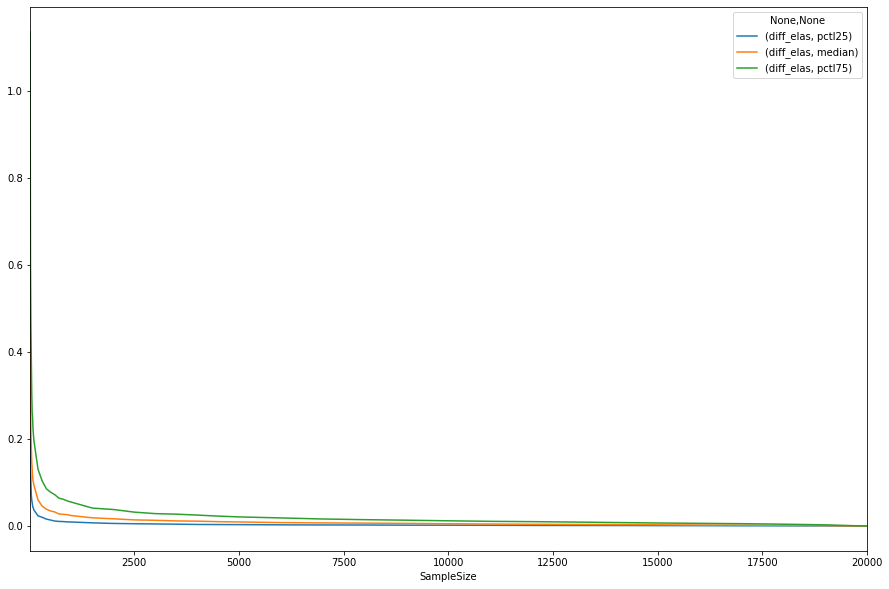

In [17]:
lim_elas.reset_index(inplace=True)
lim_elas[['SampleSize', 'diff_elas']].plot(figsize=(15, 10), x='SampleSize', y=['diff_elas', 'rel_diff_elas'])

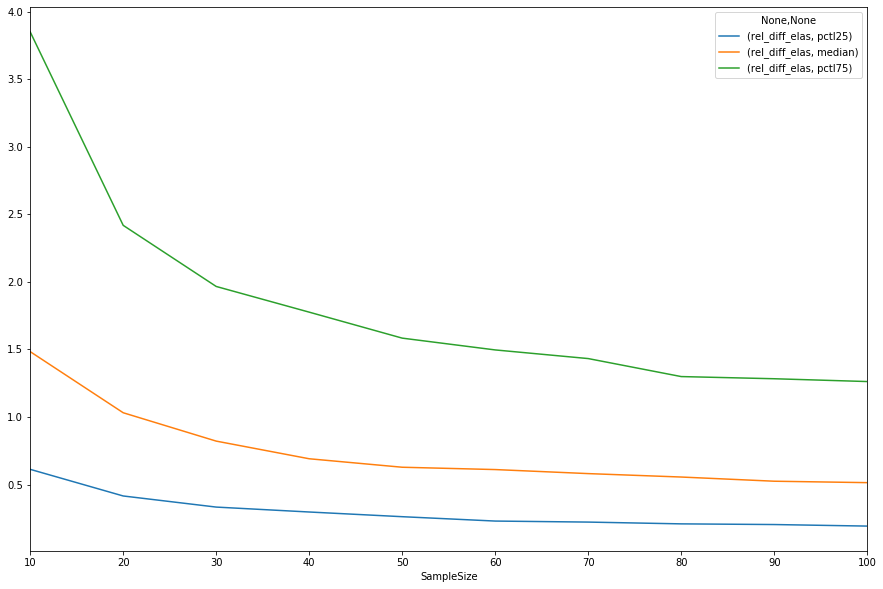

In [18]:
lim_elas[['SampleSize', 'rel_diff_elas']].tail(42).head(10).plot(figsize=(15, 10), x='SampleSize', y=['diff_elas', 'rel_diff_elas'])

## Зависимость свойств PED модели от количества различных значений цен

### Day

In [19]:
adeq_day_prices = price_data_day.groupby('Num_diff_prices').agg({'mean', 'count'})

adeq_day_prices.reset_index(inplace=True)
# adeq_day_prices = adeq_day_prices[adeq_day_prices['SampleSize'] == 2000]
adeq_day_prices = adeq_day_prices[adeq_day_prices[('SKU', 'count')] > 385]

adeq_day_prices.rename(columns={'flag_AE' : '%#_AE_day',
                          'flag_R&AE' : '%#_R&AE_day'}, level=0 , inplace=True)
#для подсчета ср. взвеш.
adeq_day_prices['%QTY_AE_day'] = adeq_day_prices[('QTY_AE_day', 'mean')] / adeq_day_prices[('Qty', 'mean')]
adeq_day_prices['%QTY_R&AE_day'] = adeq_day_prices[('QTY_R&AE_day', 'mean')] / adeq_day_prices[('Qty', 'mean')]

In [20]:
adeq_day_prices[[('Num_diff_prices', ''), ('SKU', 'count'), ('%#_R&AE_day', 'mean'), ('%#_AE_day', 'mean')]]

,Num_diff_prices,SKU,%#_R&AE_day,%#_AE_day
,,count,mean,mean
0,1,2193,0.015504,0.129959
1,2,2237,0.566831,0.681270
2,3,2244,0.616756,0.727273
3,4,2240,0.635714,0.748661
4,5,2225,0.653933,0.766292
...,...,...,...,...
220,221,403,0.942928,0.965261
221,222,399,0.942356,0.964912
222,223,392,0.941327,0.964286


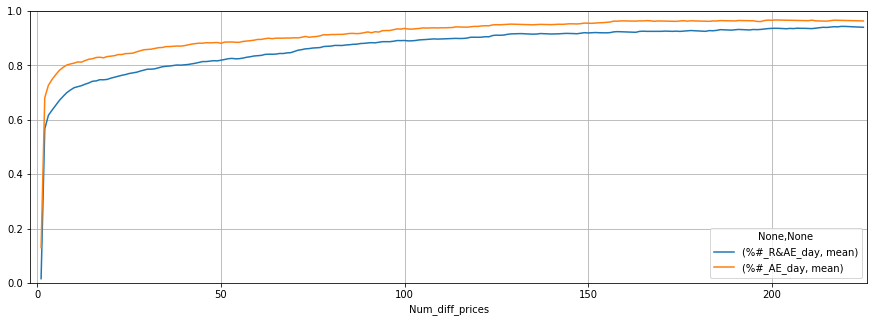

In [21]:
adeq_day_prices[[('%#_R&AE_day', 'mean'), ('%#_AE_day', 'mean'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', ylim=[0, 1], xlim=[-2, 226], grid=True)

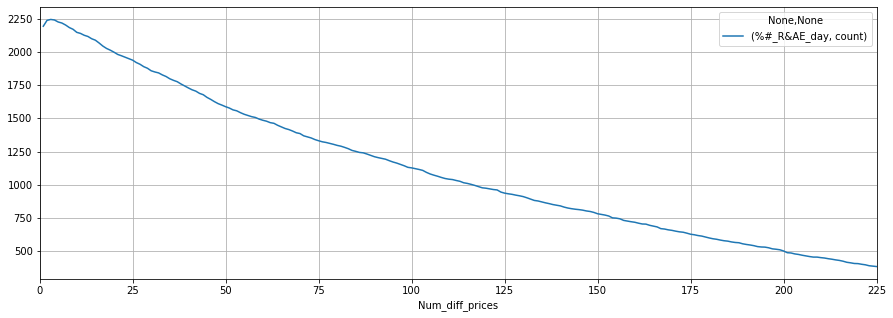

In [22]:
adeq_day_prices[[('%#_R&AE_day', 'count'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', xlim=[0, 225], grid=True)

### Week

In [23]:
adeq_week_prices = price_data_week.groupby('Num_diff_prices').agg({'mean', 'count'})

adeq_week_prices.reset_index(inplace=True)
# adeq_week_prices = adeq_week_prices[adeq_week_prices['SampleSize'] == 150]
adeq_week_prices = adeq_week_prices[adeq_week_prices[('SKU', 'count')] > 500]

adeq_week_prices.rename(columns={'flag_AE' : '%#_AE_week',
                          'flag_R&AE' : '%#_R&AE_week'}, level=0 , inplace=True)
#для подсчета ср. взвеш.
adeq_week_prices['%QTY_AE_week'] = adeq_week_prices[('QTY_AE_week', 'mean')] / adeq_week_prices[('Qty', 'mean')]
adeq_week_prices['%QTY_R&AE_week'] = adeq_week_prices[('QTY_R&AE_week', 'mean')] / adeq_week_prices[('Qty', 'mean')]

In [24]:
adeq_week_prices[[('Num_diff_prices', ''), ('SKU', 'count'), ('%#_R&AE_week', 'mean'), ('%#_AE_week', 'mean')]]

,Num_diff_prices,SKU,%#_R&AE_week,%#_AE_week
,,count,mean,mean
0,1,2170,0.038249,0.171889
1,2,2204,0.559437,0.691016
2,3,2216,0.606047,0.736462
3,4,2220,0.617117,0.750000
4,5,2219,0.635421,0.769716
...,...,...,...,...
220,221,520,0.905769,0.957692
221,222,515,0.904854,0.957282
222,223,514,0.904669,0.959144


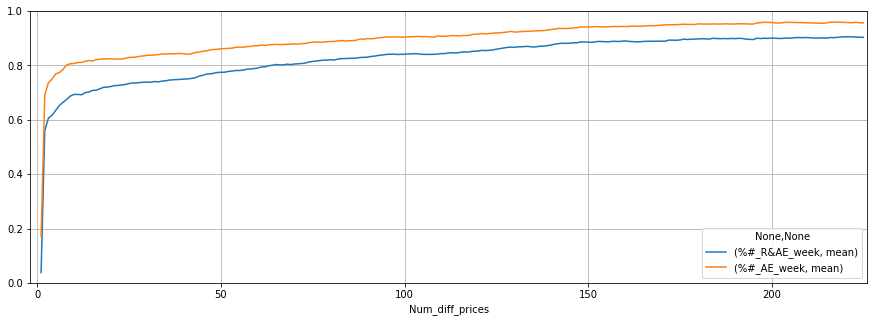

In [25]:
adeq_week_prices[[('%#_R&AE_week', 'mean'), ('%#_AE_week', 'mean'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', ylim=[0, 1], xlim=[-2, 226], grid=True)

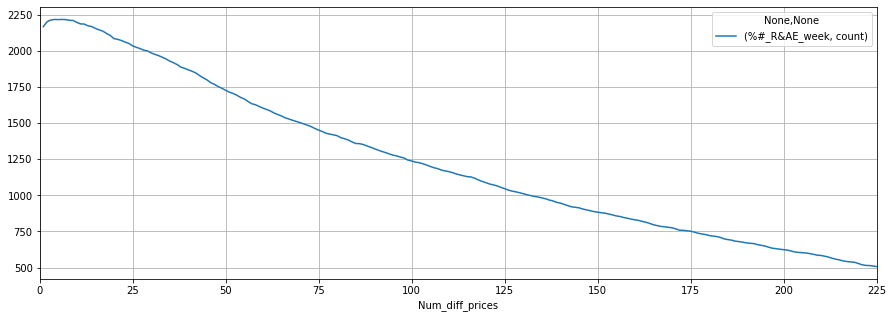

In [26]:
adeq_week_prices[[('%#_R&AE_week', 'count'), 
                 ('Num_diff_prices', '')]].plot(figsize=(15, 5), x='Num_diff_prices', xlim=[0, 225], grid=True)

## Зависимость свойств PED модели от SampleSize

In [27]:
adeq_day = sample_data_day.groupby(['SampleSize']).mean()

adeq_day.reset_index(inplace=True)

adeq_day.rename(columns={'flag_AE' : '%#_AE_day', 
                         'flag_R&AE' : '%#_R&AE_day'}, inplace=True)
adeq_day['%QTY_AE_day'] = adeq_day['QTY_AE_day'] / adeq_day['Qty']
adeq_day['%QTY_R&AE_day'] = adeq_day['QTY_R&AE_day'] / adeq_day['Qty']

columns_drop = ['SKU', 'Coefficient', 'R-squared', 'T-test-p-value', 'QTY_AE_day', 'QTY_R&AE_day', 'Num_diff_prices']
adeq_day.drop(columns_drop, axis=1, inplace=True)

In [28]:
adeq_day

,SampleSize,Elasticity,Qty,%#_AE_day,%#_R&AE_day,%QTY_AE_day,%QTY_R&AE_day
0,10,-1.364796,4.523133,0.725082,0.072289,0.707232,0.114054
1,20,-0.970527,6.693798,0.752101,0.096639,0.773320,0.196218
2,30,-0.542429,8.779017,0.767831,0.138282,0.815459,0.307734
3,40,-0.476315,10.904556,0.782258,0.168683,0.810736,0.378052
4,50,-0.469658,12.928899,0.785623,0.202290,0.810241,0.428625
...,...,...,...,...,...,...,...
65,140000,-0.767654,58339.753615,0.985423,0.985423,0.965539,0.965539
66,145000,-0.748462,55172.302110,0.983122,0.983122,0.945711,0.945711
67,150000,-0.760850,55663.678239,0.987421,0.987421,0.974806,0.974806
68,155000,-0.819198,60126.066809,0.978723,0.978723,0.959202,0.959202


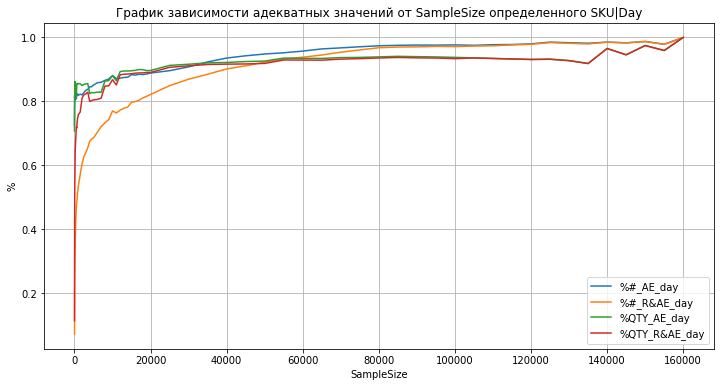

In [29]:
ae_stats_day = ['%#_AE_day', '%#_R&AE_day', '%QTY_AE_day', '%QTY_R&AE_day']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize определенного SKU|Day')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats_day:
    ax.plot(adeq_day.SampleSize, adeq_day[ae_stat], label=ae_stat)
    ax.legend()

In [30]:
adeq_week = sample_data_week.groupby(['SampleSize']).mean()

adeq_week.reset_index(inplace=True)

adeq_week.rename(columns={'flag_AE' : '%#_AE_week', 
                          'flag_R&AE' : '%#_R&AE_week'}, inplace=True)
adeq_week['%QTY_AE_week'] = adeq_week['QTY_AE_week'] / adeq_week['Qty']
adeq_week['%QTY_R&AE_week'] = adeq_week['QTY_R&AE_week'] / adeq_week['Qty']

columns_drop = ['SKU', 'Coefficient', 'R-squared', 'T-test-p-value', 'QTY_AE_week', 'QTY_R&AE_week']
adeq_week.drop(columns_drop, axis=1, inplace=True)

In [31]:
adeq_week

,SampleSize,Elasticity,Qty,Num_diff_prices,%#_AE_week,%#_R&AE_week,%QTY_AE_week,%QTY_R&AE_week
0,10,-0.575827,2.673498,7.239401,0.748753,0.115960,0.820042,0.230727
1,20,-0.653956,4.580146,12.167943,0.763676,0.188184,0.831158,0.398666
2,30,-0.439225,6.517608,16.279771,0.781071,0.262611,0.866106,0.514320
3,40,-0.429971,8.381022,19.872727,0.800000,0.308586,0.855981,0.575333
4,50,-0.447805,10.221883,23.023210,0.802963,0.342716,0.853261,0.609019
5,60,-0.440625,12.057978,25.842975,0.800681,0.366553,0.845111,0.617920
6,70,-0.418798,13.880365,28.432212,0.807692,0.381731,0.847671,0.628649
7,80,-0.415702,15.688841,30.819914,0.809909,0.398285,0.849925,0.643688
8,90,-0.408855,17.416566,33.051342,0.807819,0.411682,0.855351,0.648676
9,100,-0.408558,19.247749,35.101687,0.811153,0.426898,0.857193,0.671558


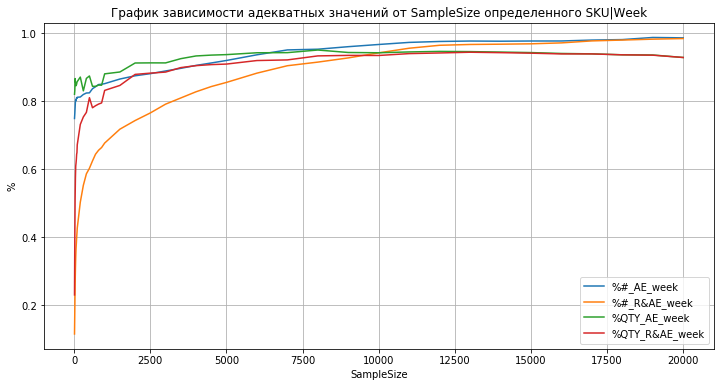

In [32]:
ae_stats_week = ['%#_AE_week', '%#_R&AE_week', '%QTY_AE_week', '%QTY_R&AE_week']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize определенного SKU|Week')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats_week:
    ax.plot(adeq_week.SampleSize, adeq_week[ae_stat], label=ae_stat)
    ax.legend()

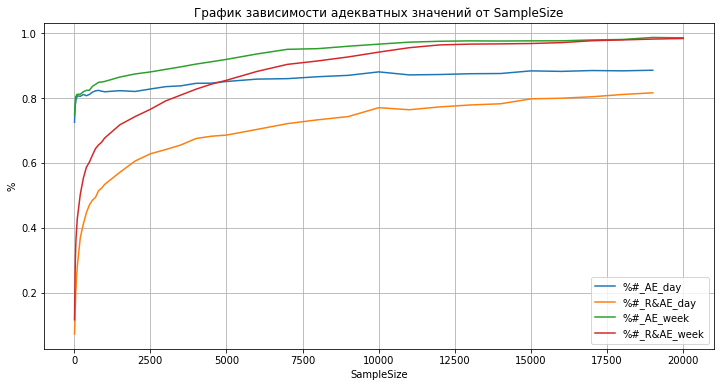

In [33]:
ae_stats_day = ['%#_AE_day', '%#_R&AE_day']
ae_stats_week = ['%#_AE_week', '%#_R&AE_week']

fig, ax = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
ax.grid() # сетка

plt.title('График зависимости адекватных значений от SampleSize')
plt.xlabel('SampleSize')
plt.ylabel('%')

for ae_stat in ae_stats_day:
    ax.plot(adeq_day[:41].SampleSize, adeq_day[:41][ae_stat], label=ae_stat)
    ax.legend()

for ae_stat in ae_stats_week:
    ax.plot(adeq_week.SampleSize, adeq_week[ae_stat], label=ae_stat)
    ax.legend()